In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from astropy.io import fits

Filename: tgsgS20201223S0020.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     251   ()      
  1  MDF           1 BinTableHDU     69   3R x 12C   [1J, 1E, 1E, 20A, 1J, 1E, 1E, 1E, 1E, 1E, 1E, 1E]   
  2  SCI           1 ImageHDU       107   (3132, 2088)   float32   


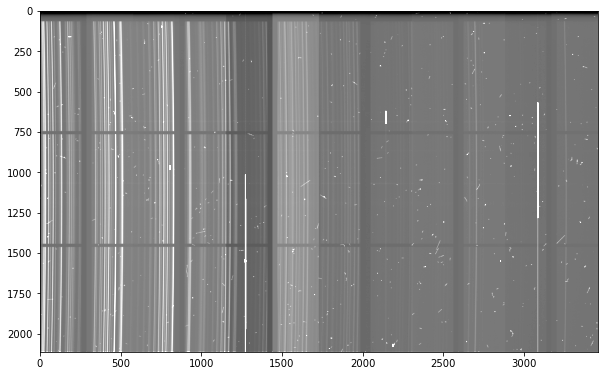

In [8]:
# Open files for different setups seperatley
d750_1 = fits.open("tgsgS20201223S0020.fits") 
d750_2 = fits.open("tgsgS20201223S0021.fits")  

d760_1 = fits.open("tgsgS20201223S0016.fits") 
d760_2 = fits.open("tgsgS20201223S0017.fits")  

t = fits.open("S20201223S0016.fits")

data750_1 = d750_1[-1].data
data750_2 = d750_2[-1].data

data760_1 = d760_1[-1].data
data760_2 = d760_2[-1].data

test_data = t[1].data
for i in range(2,len(t)):
    tmp = t[i].data
    test_data = np.hstack((test_data,tmp))
    
fig = plt.figure(figsize=(10,7))
plt.imshow(test_data,cmap='gray',vmax=np.percentile(test_data,99))

d750_1.info()
#d750_1[0].header

In [18]:
# Look at data structure and shape
print("Data Shape")
print("750 Setup:",data750_1.shape)
print("760 Setup:",data760_1.shape)

# Look at header of the files
print("750_1 Header")
d750_1[-1].header

Data Shape
750 Setup: (2088, 3132)
760 Setup: (2088, 3132)
750_1 Header


XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                 3132 / Axis length                                    
NAXIS2  =                 2088 / Axis length                                    
PCOUNT  =                    0 / No 'random' parameters                         
GCOUNT  =                    1 / Only one group                                 
EXTNAME = 'SCI     '           / Extension name                                 
EXTVER  =                    1 / Extension version                              
INHERIT =                    F / Inherits global header                         
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
OBJECT  = 'KSP-ZN7090-1_2020F' / Name of the object observed                    
DATE    = '2022-08-10T16:09:

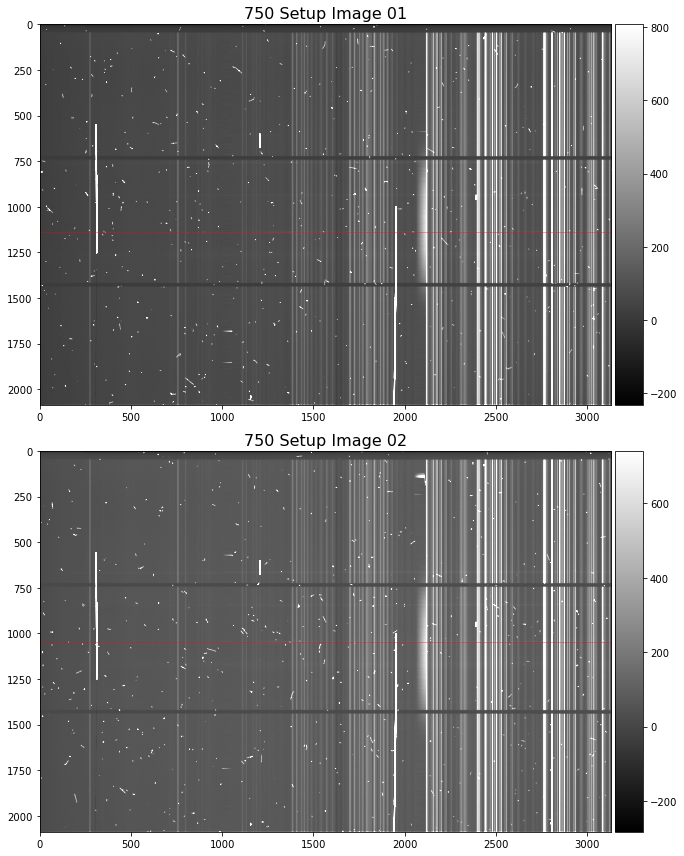

In [5]:
gr = 1.618

fig, (a1,a2) = plt.subplots(figsize=(gr*12,12),nrows=2)
a1.set_title("750 Setup Image 01",fontsize=16)
a1.axhline(y=1140,c='r',alpha=0.5,linewidth=0.7)
im1 = a1.imshow(data750_1,cmap='gray',vmax=np.percentile(data750_1,98))
divider = make_axes_locatable(a1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

a2.set_title("750 Setup Image 02",fontsize=16)
im2 = a2.imshow(data750_2,cmap='gray',vmax=np.percentile(data750_2,98))
a2.axhline(y=1046,c='r',alpha=0.5,linewidth=0.7)
divider = make_axes_locatable(a2)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation='vertical')
plt.tight_layout()
plt.show()

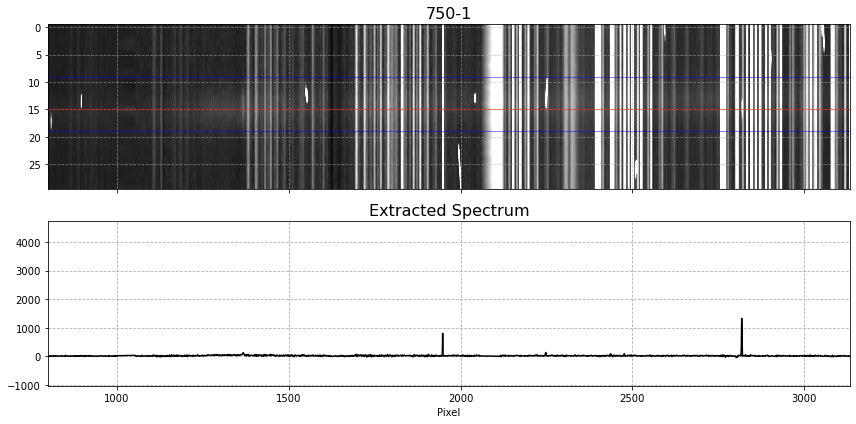

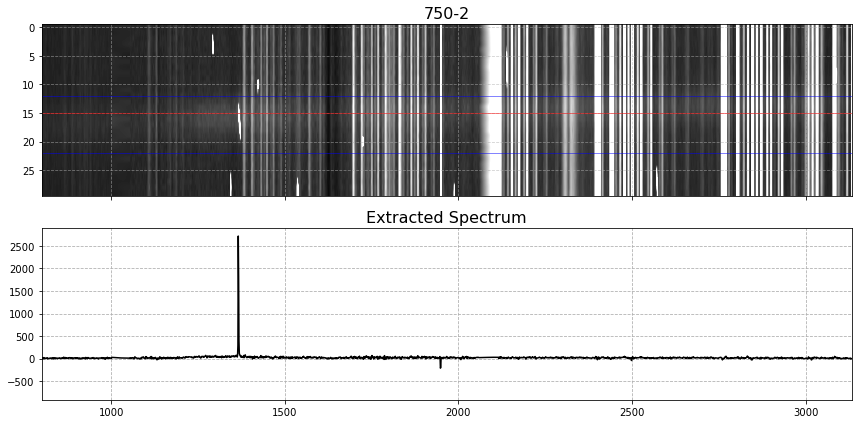

In [16]:
# Find source and define boundary around it
s1_index = 1141
s750_1 = data750_1[s1_index]
s750_1b = data750_1[s1_index-15:s1_index+15]

# Substract sky from spectrum
sky1 = (s750_1b[14] + s750_1b[16])/2
spec1 = s750_1 - sky1

s2_index = 1046
s750_2 = data750_2[s2_index]
s750_2b = data750_2[s2_index-15:s2_index+15]

# Substract sky from spectrum
sky2 = (s750_2b[14] + s750_2b[16])/2
spec2 = s750_2 - sky2

# Plot chosen region for 1st image
fig, (a1,a2) = plt.subplots(figsize=(12,6),nrows=2,sharex=True)
a1.set_title("750-1",fontsize=16)
im1 = a1.imshow(s750_1b,cmap='gray',aspect='auto',vmax=np.percentile(data750_1,95))
a1.axhline(y=[15],c='r',alpha=0.8,linewidth=0.6)
a1.axhline(y=[9],c='b',alpha=0.8,linewidth=0.6)
a1.axhline(y=[19],c='b',alpha=0.8,linewidth=0.6)
a1.grid(ls='--',alpha=0.6)

# Substract sky from spectrum
sky1 = (s750_1b[9] + s750_1b[19])/2
spec1 = s750_1 - sky1

a2.set_title("Extracted Spectrum",fontsize=16)
a2.plot(spec1,c='k')
a2.set_xlim([800,s750_1b.shape[1]])
a2.grid(ls='--') 
a2.set_xlabel("Pixel")
plt.tight_layout()
plt.show()

# Plot chosen region for 2nd image
fig, (a1,a2) = plt.subplots(figsize=(12,6),nrows=2,sharex=True)
a1.set_title("750-2",fontsize=16)
im1 = a1.imshow(s750_2b,cmap='gray',aspect='auto',vmax=np.percentile(data750_2,95))
a1.axhline(y=[15],c='r',alpha=0.8,linewidth=0.6)
a1.axhline(y=[12],c='b',alpha=0.8,linewidth=0.6)
a1.axhline(y=[22],c='b',alpha=0.8,linewidth=0.6)
a1.grid(ls='--',alpha=0.6)

# Substract sky from spectrum
sky2 = (s750_2b[12] + s750_2b[22])/2
spec2 = s750_2 - sky2

a2.set_title("Extracted Spectrum",fontsize=16)
a2.plot(spec2,c='k')
a2.grid(ls='--')
a2.set_xlim([800,s750_2b.shape[1]])
#a2.set_ylim([-100,100])
plt.tight_layout()
plt.show()

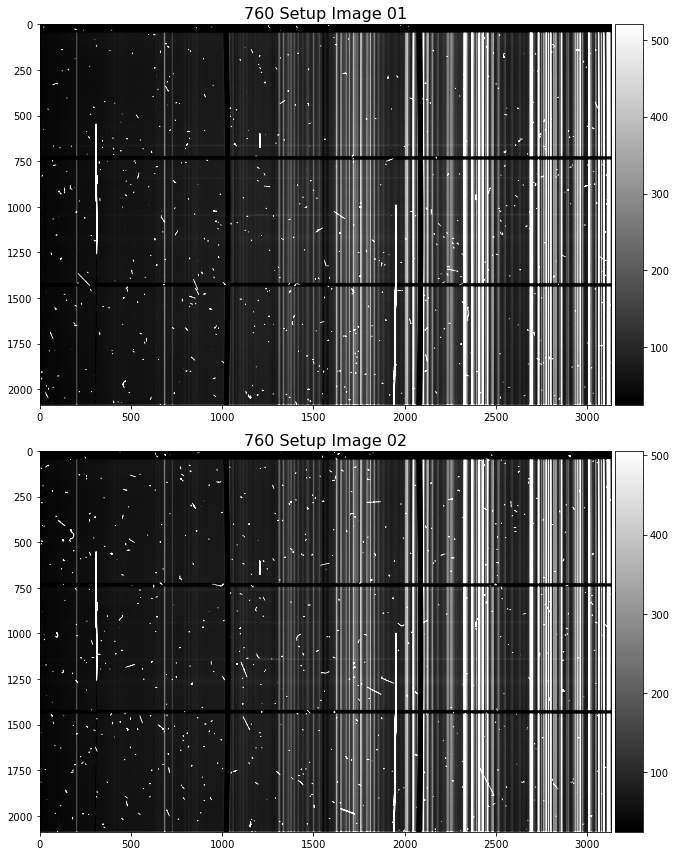

In [7]:
fig, (a1,a2) = plt.subplots(figsize=(gr*12,12),nrows=2)
a1.set_title("760 Setup Image 01",fontsize=16)
im1 = a1.imshow(data760_1,cmap='gray',vmin=np.percentile(data760_1,5),vmax=np.percentile(data760_1,95))
divider = make_axes_locatable(a1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

a2.set_title("760 Setup Image 02",fontsize=16)
im2 = a2.imshow(data760_2,cmap='gray',vmin=np.percentile(data760_2,5),vmax=np.percentile(data760_2,95))
divider = make_axes_locatable(a2)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation='vertical')
plt.tight_layout()
plt.show()